In [2]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

In [3]:
cm = 2e-9
gl = 25e-9			# Condutância de vazamento
el = -70e-3			# Potencial reverso
vth = -50e-3		# Limiar (th) em mV do potencial de membrana do neurônio
vr = -65e-3			# Valor reajustado do potencial de membrana
h = 0.1e-3			# Passo da simulação (0.1 = 100 milisegundos)
iIhj = 2e-9			# Corrente externa aplicada ao neurônio
temSim = int(3/h) 		# Tempo total da simulação 3 segundos
tau = cm/gl
R = 1/gl

## a) Implemente e simule o modelo acima por 3 segundos. Utilize o método de Euler com passo h=0,1 ms e Iinj=2 nA.

In [4]:
v_a = np.zeros(temSim+1)
v_a[0] = vr
spikesA = np.zeros(temSim+1)
I = np.zeros(temSim+1);
for i in range(temSim+1):
	I[i] = iIhj

In [5]:
for i in range(0, temSim):
    v_a[i+1] = v_a[i] + ((1/tau)*(el - v_a[i] + I[i] * R)) *h 				# Item (a)
    if v_a[i+1] > vth:
        spikesA[i] = 1
        v_a[i+1] = vr

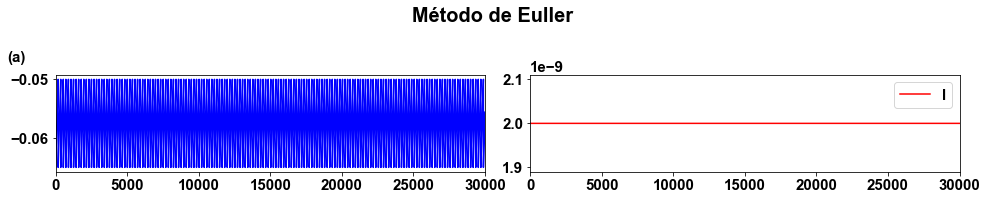

In [6]:
sizefonte = 15
font = {'family' : 'arial',
    'weight' : 'bold',
    'size'   : sizefonte}
plt.rc('font', **font)
fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)

fig.suptitle('Método de Euller', fontsize=sizefonte+5, weight="bold")
linhas = 5
colunas = 4
ax1 = plt.subplot2grid((linhas, colunas), (0, 0), colspan=2)
ax1.text(-0.07, 1.25, '(a)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')
plt.plot(v_a, 'b')
plt.xlim(0,temSim)

ax2 = plt.subplot2grid((linhas, colunas), (0, 2), colspan=2)
plt.plot(I, 'r', label='I')
ax2.legend(loc='upper right')
plt.xlim(0,temSim);

### 2nA é um valor alto e faz o neuronrio disparar bastante.

##  b) A corrente de reobase é definida como a corrente abaixo da qual o neurônio não dispara. Construa uma simulação que permita verificar, experimentalmente, o valor da corrente de reobase para os parâmetros listados. Qual o valor desta corrente?

In [8]:
v_b = np.zeros(temSim+1)
v_b[0] = vr
alpha = np.linspace(0,1,num=temSim+1)
spikesB = np.zeros(temSim+1)
contDisparosB = 0

for i in range(0, temSim):
    v_b[i+1] = v_b[i] + ((1/tau)*(el - v_b[i] + I[i] * R * alpha[i])) *h 	# Item (b)
    
    if v_b[i+1] > vth:
        contDisparosB+=1
        spikesB[i] = 1
        if contDisparosB == 1:
            print("Posião no tempo[{}] | Valor da corrente alpha [{}]".format(i,alpha[i]))
        v_b[i+1] = vr

Posião no tempo[8299] | Valor da corrente alpha [0.27663333333333334]


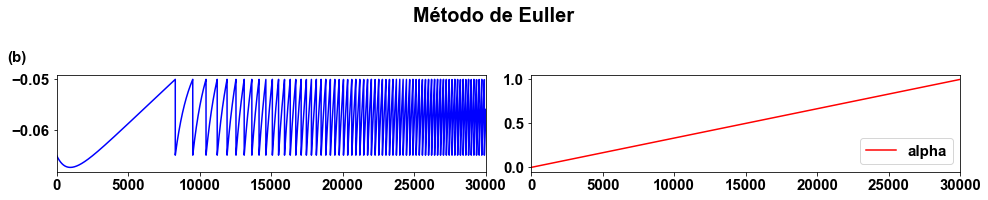

In [10]:
plt.rc('font', **font)
fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
fig.suptitle('Método de Euller', fontsize=sizefonte+5, weight="bold")
linhas = 5
colunas = 4
ax1 = plt.subplot2grid((linhas, colunas), (0, 0), colspan=2)
ax1.text(-0.07, 1.25, '(b)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')
plt.xlim(0,temSim)
plt.plot(v_b, 'b');

ax2 = plt.subplot2grid((linhas, colunas), (0, 2), colspan=2)
plt.plot(alpha, 'r', label='alpha')
ax2.legend(loc='lower right')
plt.xlim(0,temSim);

### Com o aumento gradual da corrente o neuronio vai aumentando a taxa de disparos

## c) O potencial de membrana do neurônio descrito depende do valor da corrente externa injetada. Construa o gráfico f x Iinj, em que f é a taxa de disparos do neurônio no período de simulação.

In [11]:
tam = 7
v_c = [np.zeros(temSim+1) for i in range(tam)]
v_I = [np.zeros(temSim+1) for i in range(tam)]
v_d = [np.zeros(temSim+1) for i in range(tam)]
v_c_count = [0 for i in range(tam)]

for i in range(tam):
    v_c[i][0] = vr
    
for i in range(temSim+1):
    v_I[0][i] = .3
    v_I[1][i] = .6
    v_I[2][i] = .9
    v_I[3][i] = 1.2
    v_I[4][i] = 1.5
    v_I[5][i] = 1.8
    v_I[6][i] = 2
    
for i in range(0, temSim):
    for j in range(len(v_c)):
        v_c[j][i+1] = v_c[j][i] + ((1/tau)*(el - v_c[j][i] + I[i] * R * v_I[j][i])) *h
        
        if v_c[j][i+1] > vth:
            v_c[j][i+1] = vr
            v_c_count[j] +=1
            v_d[j][i] = 1

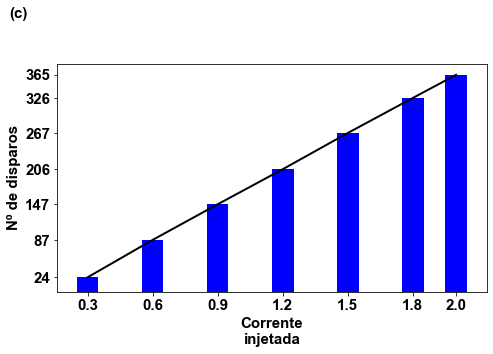

In [13]:
fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
ax1 = plt.subplot2grid((linhas, colunas), (2, 0), colspan=2, rowspan=2)
ax1.text(-0.07, 1.25, '(c)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')

injetValues = [v_I[0][0], v_I[1][0], v_I[2][0], v_I[3][0], v_I[4][0], v_I[5][0], v_I[6][0]]
plt.yticks(v_c_count)
plt.xticks(injetValues)
ax1.set_xlabel("Corrente\ninjetada", fontsize=sizefonte, fontweight='bold')
ax1.set_ylabel("Nº de disparos", fontsize=sizefonte, fontweight='bold')
plt.plot(injetValues, v_c_count, 'k', linewidth=2)
plt.bar(injetValues, v_c_count,  width=.1, color='b');

### Com valores de corrente de entrada aumentando, o numero de disparos também aumentou bastante, conforme mostra o grafico

## d) Construa o histograma dos intervalos entre disparos para o neurônio descrito

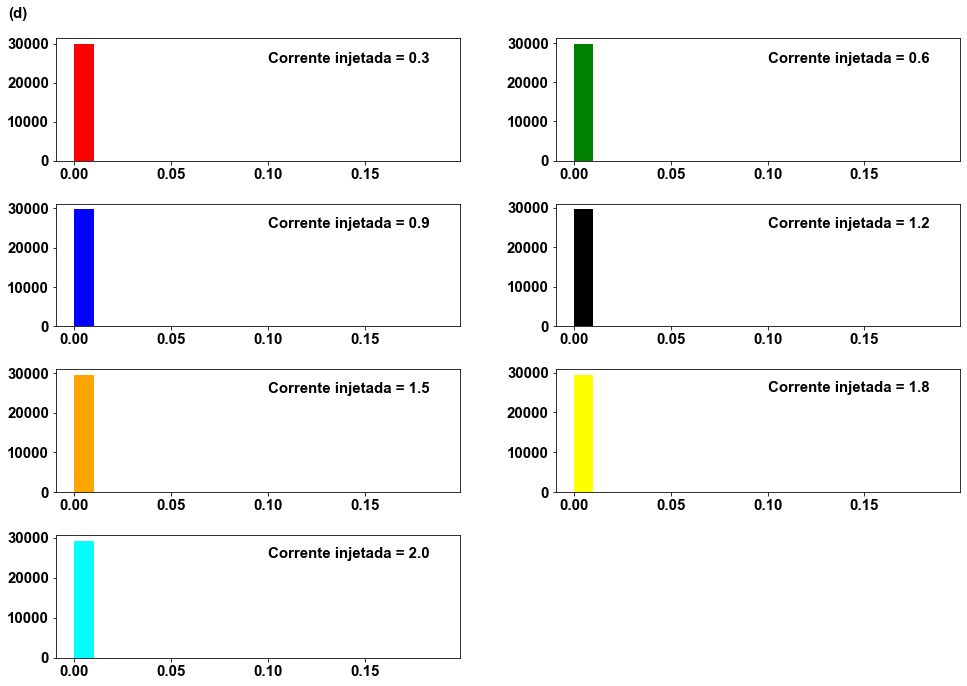

In [15]:
intervals = [np.zeros(temSim+1) for i in range(tam)]
for i in range(len(intervals)):
    intervals[i] = diff(v_d[i])
    intervals[i] = intervals[i][where(intervals[i] >= 0)]

bins = np.arange(0, .2, .01)

fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
colunas = 2
linhas = 4

ax1 = plt.subplot2grid((linhas, colunas), (0, 0))
ax1.text(-0.07, 1.25, '(d)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')
plt.hist(intervals[0], bins=bins, color='r')
ax1.annotate('Corrente injetada = {}'.format(injetValues[0]), xy=(.1, 20000), xytext=(.1, 25000))

ax2 = plt.subplot2grid((linhas, colunas), (0, 1))
plt.hist(intervals[1], bins=bins, color='g')
ax2.annotate('Corrente injetada = {}'.format(injetValues[1]), xy=(.1, 20000), xytext=(.1, 25000))

ax3 = plt.subplot2grid((linhas, colunas), (1, 0))
plt.hist(intervals[2], bins=bins, color='b')
ax3.annotate('Corrente injetada = {}'.format(injetValues[2]), xy=(.1, 20000), xytext=(.1, 25000))

ax4 = plt.subplot2grid((linhas, colunas), (1, 1))
plt.hist(intervals[3], bins=bins, color='k')
ax4.annotate('Corrente injetada = {}'.format(injetValues[3]), xy=(.1, 20000), xytext=(.1, 25000))

ax5 = plt.subplot2grid((linhas, colunas), (2, 0))
plt.hist(intervals[4], bins=bins, color='orange')
ax5.annotate('Corrente injetada = {}'.format(injetValues[4]), xy=(.1, 20000), xytext=(.1, 25000))

ax6 = plt.subplot2grid((linhas, colunas), (2, 1))
plt.hist(intervals[5], bins=bins, color='yellow')
ax6.annotate('Corrente injetada = {}'.format(injetValues[5]), xy=(.1, 20000), xytext=(.1, 25000))

ax7 = plt.subplot2grid((linhas, colunas), (3, 0))
ax7.annotate('Corrente injetada = {}'.format(injetValues[6]), xy=(.1, 20000), xytext=(.1, 25000))
plt.hist(intervals[6], bins=bins, color='cyan');

### Como o intervalo de tempo entre os disparos se mantem constante, é natural que e o histograma mostre apenas uma barra no gráfico.

## e) Repita os itens c e d, porém considere agora que Iinj possui amplitude de 2 nA e sofre a influência de um ruído. Avalie a influência de diferentes magnitudes de ruído. 

In [17]:
tam = 7
v_e = [np.zeros(temSim+1) for i in range(tam)]
v_I = [np.zeros(temSim+1) for i in range(tam)]
ruido = [np.zeros(temSim+1) for i in range(tam)]
spikes = [np.zeros(temSim+1) for i in range(tam)]
v_e_count = [0 for i in range(tam)]

for i in range(tam):
    v_e[i][0] = vr

for i in range(temSim+1):
    I[i] = iIhj
    v_I[0][i] = .3
    v_I[1][i] = .6
    v_I[2][i] = .9
    v_I[3][i] = 1.2
    v_I[4][i] = 1.5
    v_I[5][i] = 1.8
    v_I[6][i] = 2

np.random.seed(1145)
# 0 é a média da distribuição normal | 1 is the standard deviation of the normal distribution | temSim+1 tamanho do ruido
ruido[0] = np.random.normal(0, .3, temSim+1)
ruido[1] = np.random.normal(0, .6, temSim+1)
ruido[2] = np.random.normal(0, .9, temSim+1)
ruido[3] = np.random.normal(0, 1.2, temSim+1)
ruido[4] = np.random.normal(0, 1.5, temSim+1)
ruido[5] = np.random.normal(0, 1.8, temSim+1)
ruido[6] = np.random.normal(0, 2, temSim+1)

for i in range(0, temSim):
    for j in range(len(v_e)):
        v_e[j][i+1] = v_e[j][i] + ((1/tau)*(el - v_e[j][i] + (v_I[j][i] * R )))* h + (ruido[j][i] * R * np.sqrt(h)/tau)
        
        if v_e[j][i+1] > vth:
            v_e[j][i+1] = vr
            v_e_count[j] +=1
            spikes[j][i+1] = 1

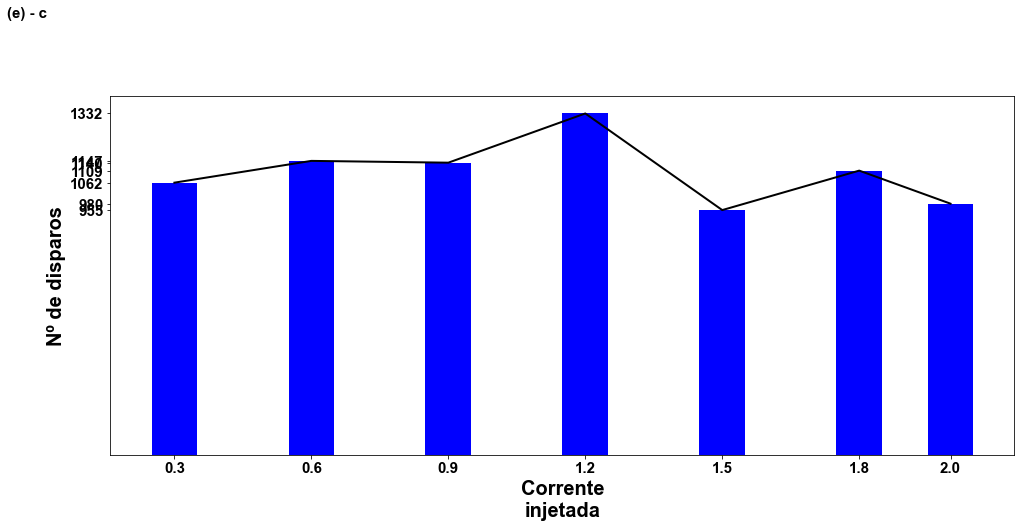

In [18]:
fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
colunas = 3
linhas = 5
ax1 = plt.subplot2grid((linhas, colunas), (2, 0), colspan=3, rowspan=5)
ax1.text(-0.07, 1.25, '(e) - c', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')

injetValues = [v_I[0][0], v_I[1][0], v_I[2][0], v_I[3][0], v_I[4][0], v_I[5][0], v_I[6][0]]
plt.yticks(v_e_count)
plt.xticks(injetValues)
ax1.set_xlabel("Corrente\ninjetada", fontsize=sizefonte+5, fontweight='bold')
ax1.set_ylabel("Nº de disparos", fontsize=sizefonte+5, fontweight='bold')
plt.plot(injetValues, v_e_count, 'k', linewidth=2)
plt.bar(injetValues, v_e_count,  width=.1, color='b');

### Com o ruido injetado, não é possivel ver uma crescente continua no numero de disparos conforme a corrente vai aumentando

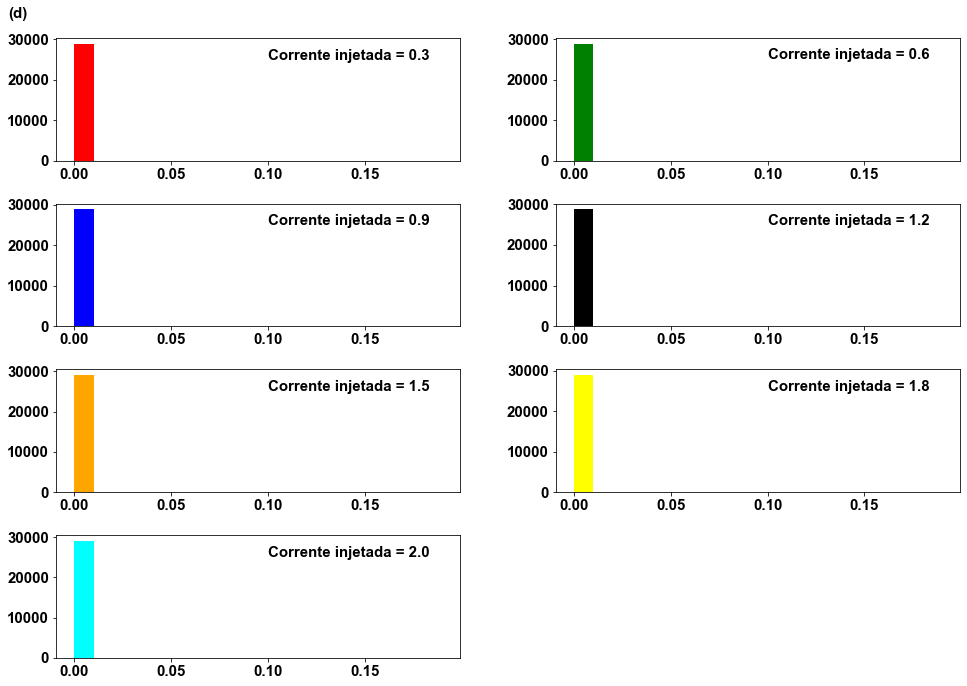

In [19]:
intervals = [np.zeros(temSim+1) for i in range(tam)]
for i in range(len(spikes)):
    intervals[i] = diff(spikes[i])
    intervals[i] = intervals[i][where(intervals[i] >= 0)]

bins = np.arange(0, .2, .01)

fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
colunas = 2
linhas = 4

ax1 = plt.subplot2grid((linhas, colunas), (0, 0))
ax1.text(-0.07, 1.25, '(d)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')
plt.hist(intervals[0], bins=bins, color='r')
ax1.annotate('Corrente injetada = {}'.format(injetValues[0]), xy=(.1, 20000), xytext=(.1, 25000))

ax2 = plt.subplot2grid((linhas, colunas), (0, 1))
plt.hist(intervals[1], bins=bins, color='g')
ax2.annotate('Corrente injetada = {}'.format(injetValues[1]), xy=(.1, 20000), xytext=(.1, 25000))

ax3 = plt.subplot2grid((linhas, colunas), (1, 0))
plt.hist(intervals[2], bins=bins, color='b')
ax3.annotate('Corrente injetada = {}'.format(injetValues[2]), xy=(.1, 20000), xytext=(.1, 25000))

ax4 = plt.subplot2grid((linhas, colunas), (1, 1))
plt.hist(intervals[3], bins=bins, color='k')
ax4.annotate('Corrente injetada = {}'.format(injetValues[3]), xy=(.1, 20000), xytext=(.1, 25000))

ax5 = plt.subplot2grid((linhas, colunas), (2, 0))
plt.hist(intervals[4], bins=bins, color='orange')
ax5.annotate('Corrente injetada = {}'.format(injetValues[4]), xy=(.1, 20000), xytext=(.1, 25000))

ax6 = plt.subplot2grid((linhas, colunas), (2, 1))
plt.hist(intervals[5], bins=bins, color='yellow')
ax6.annotate('Corrente injetada = {}'.format(injetValues[5]), xy=(.1, 20000), xytext=(.1, 25000))

ax7 = plt.subplot2grid((linhas, colunas), (3, 0))
ax7.annotate('Corrente injetada = {}'.format(injetValues[6]), xy=(.1, 20000), xytext=(.1, 25000))
plt.hist(intervals[6], bins=bins, color='cyan');

### Professor eu definitivamente não sei porque o esse histograma esta com apenas uma barrinha mas tenho consciencia que deveria ter varias barrias no começo do grafico e a quantidade ir diminuindo com o passar do tempo.